# Hotness Plotting

In [57]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
hot_metro_data = pd.read_csv("data/RDC_MarketHotness_Monthly_Metro.csv")
hot_county_data = pd.read_csv("data/RDC_MarketHotness_Monthly_County.csv")
hot_zip_data = pd.read_csv("data/RDC_MarketHotness_Monthly_Zip.csv")
regionid_data = pd.read_csv("data/CountyCrossWalk_Zillow.csv", encoding='ISO-8859-1')

# Combine the data into a single dataset
data_metro = pd.DataFrame(hot_metro_data)
data_county = pd.DataFrame(hot_county_data)
data_zip = pd.DataFrame(hot_zip_data)
data_region = pd.DataFrame(regionid_data)

# Display the data table for preview
data_metro.head()

,Month,CBSACode,CBSATitle,Nielsen HH Rank,Hotness Rank,Hotness Rank M/M,Hotness Rank Y/Y,Hotness Score,Supply Score,Demand Score,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
0,201812,11260,"Anchorage, AK",140,275.0,-3.0,-11.0,12.876254,19.063545,6.688963,...,0.0638,20.0,0.1250,0.3333,0.5902,299900.0,-0.0003,0.0523,1.0377,0
1,201812,13820,"Birmingham-Hoover, AL",49,168.0,-8.0,57.0,46.488294,39.799331,53.177258,...,-0.1224,6.0,-0.0496,0.5581,1.0984,219900.0,0.0000,0.1078,0.7609,0
2,201812,20100,"Dover, DE",251,235.0,-6.0,17.0,25.752508,9.364548,42.140468,...,0.0280,30.0,-0.0164,0.3953,0.9836,259900.0,-0.0094,0.0834,0.8993,0
3,201812,17200,"Claremont-Lebanon, NH-VT",195,286.0,-3.0,4.0,9.197324,0.334448,18.060201,...,-0.0719,62.0,-0.0316,0.3143,0.7541,259000.0,0.0000,0.0796,0.8962,0
4,201812,24540,"Greeley, CO",177,142.0,-2.0,-59.0,54.013378,88.963211,19.063545,...,0.0167,-19.0,0.0108,-0.0962,0.7705,390000.0,-0.0001,0.0100,1.3495,0


In [49]:
# Display the data table for preview
data_county.head()

,Month,CountyFIPS,CountyName,Nielsen HH Rank,Hotness Rank Within CBSA,CBSACode,CBSATitle,Hotness Rank,Hotness Rank M/M,Hotness Rank Y/Y,...,Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),Views Per Property (vs CBSA),Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Median Listing Price (vs CBSA),Quality Flag
0,201812,24510,"Baltimore city, MD",97,6.0,12580,"Baltimore-Columbia-Towson, MD",670.0,29.0,17.0,...,0.0566,0.1667,0.4590,0.5283,169900.0,-0.0556,0.1334,0.5879,0.5701,0
1,201812,42007,"Beaver, PA",353,2.0,38300,"Pittsburgh, PA",461.0,-94.0,69.0,...,-0.0470,0.3396,1.1639,0.9467,149900.0,-0.0298,0.0715,0.5187,0.8670,0
2,201812,42011,"Berks, PA",170,1.0,39740,"Reading, PA",285.0,-9.0,243.0,...,-0.0588,0.4667,1.4426,1.0000,199900.0,-0.0476,0.1423,0.6917,1.0000,0
3,201812,36019,"Clinton, NY",678,1.0,38460,"Plattsburgh, NY",785.0,31.0,15.0,...,0.0517,0.3261,1.0000,0.9683,160000.0,-0.1059,0.1437,0.5536,1.0000,0
4,201812,13045,"Carroll, GA",576,13.0,12060,"Atlanta-Sandy Springs-Roswell, GA",491.0,45.0,-70.0,...,-0.0980,0.0000,0.7541,0.7667,219900.0,0.0169,0.0476,0.7609,0.7061,0


In [50]:
# Display the data table for preview
data_zip.head()

,Month,ZipCode,ZipName,Nielsen HH Rank,Hotness Rank Within County,CountyFIPS,CountyName,Hotness Rank Within CBSA,CBSACode,CBSATitle,...,Views Per Property (vs US),Views Per Property (vs CBSA),Views Per Property (vs County),Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Median Listing Price (vs CBSA),Median Listing Price (vs County),Quality Flag
0,201812,1701,"Framingham, MA",2811,40.0,25017,Middlesex,92.0,14460,"Boston-Cambridge-Newton, MA-NH",...,2.1803,0.9925,0.8261,495000.0,-0.0085,-0.1080,1.7128,0.9902,0.8391,NaN
1,201812,1588,"Whitinsville, MA",9263,6.0,25027,Worcester,6.0,49340,"Worcester, MA-CT",...,1.8525,1.0971,1.0367,274700.0,-0.0741,0.1081,0.9505,0.9160,0.8585,NaN
2,201812,1850,"Lowell, MA",7793,1.0,25017,Middlesex,1.0,14460,"Boston-Cambridge-Newton, MA-NH",...,5.7377,2.6119,2.1739,259900.0,0.0192,0.1681,0.8993,0.5199,0.4405,NaN
3,201812,1602,"Worcester, MA",5120,7.0,25027,Worcester,7.0,49340,"Worcester, MA-CT",...,2.4754,1.4660,1.3853,274950.0,0.0002,-0.0074,0.9514,0.9168,0.8592,NaN
4,201812,1944,"Manchester, MA",12371,37.0,25009,Essex,233.0,14460,"Boston-Cambridge-Newton, MA-NH",...,1.4590,0.6642,0.4917,1825000.0,0.1406,0.2920,6.3149,3.6507,3.8838,NaN


In [58]:
regionid_data.head()

,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,CBSACode
0,Hudson,New Jersey,34,17,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1106,394913.0,34017,35620.0
1,Morris,New Jersey,34,27,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1241,394913.0,34027,35620.0
2,Nassau,New York,36,59,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1252,394913.0,36059,35620.0
3,Orange,New York,36,71,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1290,394913.0,36071,35620.0
4,Putnam,New York,36,79,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1343,394913.0,36079,35620.0


In [32]:
# data.count()
# data_clean = data.dropna(how='any')
# data_clean.count()
# data_clean.dtypes
data_rename = data_clean.rename(index=str, 
                                columns={"Hotness Rank ": "hrank", 
                                         "Hotness Score": "hscore",
                                         "Median Listing Price": "MedListPrice"}
                               )
# data_rename.columns
# data_rename.head()
data_sort = data_rename.sort_values(by=['hrank'])
data_sort.head()

,Month,CBSACode,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,Hotness Rank Y/Y,hscore,Supply Score,Demand Score,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
220,201812,17020,"Chico, CA",196,1.0,15.0,28.0,100.000000,100.000000,100.000000,...,-0.4559,-43.0,0.1939,0.7640,2.5738,330000.0,0.0909,0.1466,1.1419,0
285,201812,33260,"Midland, TX",260,2.0,-1.0,18.0,98.494983,97.658863,99.331104,...,-0.2000,-28.0,0.0480,0.2241,2.3279,350790.0,-0.0214,0.1288,1.2138,0
280,201812,36220,"Odessa, TX",292,3.0,1.0,41.0,94.816054,95.317726,94.314381,...,-0.1791,-25.0,0.0505,0.4444,1.7049,270000.0,0.0133,0.3171,0.9343,0
95,201812,18140,"Columbus, OH",31,4.0,-1.0,5.0,94.481605,91.638796,97.324415,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0
252,201812,23060,"Fort Wayne, IN",119,5.0,-3.0,7.0,94.314381,88.963211,99.665552,...,0.0000,-19.0,0.0068,0.3704,2.4262,179900.0,0.0000,0.1105,0.6225,0


In [16]:
data_revsort = data_rename.sort_values(by=['hrank'], ascending=False)
data_revsort.head()

,Month,CBSACode,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,Hotness Rank Y/Y,hscore,Supply Score,Demand Score,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
137,201812,31340,"Lynchburg, VA",175,300.0,-2.0,-54.0,1.003344,0.668896,1.337793,...,0.3500,55.0,-0.0476,-0.2683,0.4918,149992.5,-0.0320,-0.3179,0.5190,0
74,201812,10500,"Albany, GA",279,299.0,1.0,-4.0,1.337793,2.006689,0.668896,...,0.1389,43.0,0.1200,0.3333,0.4590,119000.0,-0.0476,-0.0238,0.4118,0
80,201812,26380,"Houma-Thibodaux, LA",218,298.0,1.0,2.0,2.006689,4.013378,0.000000,...,0.0000,38.0,0.0952,0.0952,0.3770,184787.5,0.0043,0.0806,0.6394,0
49,201812,15180,"Brownsville-Harlingen, TX",158,297.0,-4.0,0.0,5.183946,0.000000,10.367893,...,0.0996,69.0,-0.0370,0.3448,0.6393,205500.0,-0.0167,0.0275,0.7111,0
202,201812,17980,"Columbus, GA-AL",161,296.0,-4.0,-12.0,5.852843,8.361204,3.344482,...,0.0673,31.0,0.0323,0.2800,0.5246,167872.5,-0.0100,0.0492,0.5809,0


In [34]:
nc_df = data_rename.loc[data_rename['CBSATitle'].str.contains(', NC')]
nc_sort = nc_df.sort_values(by=['hrank'])
nc_sort

,Month,CBSACode,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,Hotness Rank Y/Y,hscore,Supply Score,Demand Score,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
157,201812,16740,"Charlotte-Concord-Gastonia, NC-SC",24,32.0,13.0,29.0,81.438127,72.575251,90.301003,...,-0.0800,-11.0,0.0104,0.2125,1.5902,323268.0,-0.0068,-0.0053,1.1186,0
101,201812,24660,"Greensboro-High Point, NC",69,66.0,9.0,103.0,72.909699,57.190635,88.628763,...,-0.1477,-5.0,0.0323,0.6552,1.5738,219900.0,0.0023,0.1459,0.7609,0
51,201812,15500,"Burlington, NC",262,77.0,15.0,139.0,69.732441,53.177258,86.287625,...,-0.2830,-4.0,0.0106,0.8627,1.5574,245000.0,0.0169,0.1562,0.8478,0
138,201812,39580,"Raleigh, NC",46,97.0,0.0,-27.0,63.377926,50.836120,75.919732,...,0.0685,-2.0,-0.0119,0.1370,1.3607,339900.0,0.0000,0.0140,1.1761,0
244,201812,49180,"Winston-Salem, NC",80,118.0,-9.0,44.0,60.200669,43.812709,76.588629,...,-0.0349,3.0,-0.0173,0.4655,1.3934,208500.0,-0.0067,0.0620,0.7215,0
172,201812,20500,"Durham-Chapel Hill, NC",96,122.0,1.0,7.0,58.361204,44.816054,71.906355,...,-0.0575,2.0,0.0318,0.1250,1.3279,351050.0,-0.0180,0.0030,1.2147,0
254,201812,25860,"Hickory-Lenoir-Morganton, NC",143,156.0,0.0,30.0,48.829431,14.381271,83.277592,...,-0.1345,23.0,0.0055,0.2778,1.5082,219900.0,0.0230,-0.0437,0.7609,0
10,201812,11700,"Asheville, NC",106,187.0,-17.0,-14.0,38.963211,11.036789,66.889632,...,0.1250,28.0,-0.0446,0.1538,1.2295,374900.0,-0.0003,0.0742,1.2972,0
237,201812,48900,"Wilmington, NC",165,222.0,5.0,10.0,29.765886,5.016722,54.515050,...,0.0833,37.0,0.0000,0.3878,1.1148,339500.0,-0.0138,0.0446,1.1747,0
250,201812,22180,"Fayetteville, NC",134,270.0,4.0,11.0,14.715719,22.408027,7.023411,...,-0.0300,17.0,-0.0526,0.5652,0.5902,159900.0,-0.0003,0.0290,0.5533,0


In [35]:
nc_sort.columns

Index(['Month', 'CBSACode', 'CBSATitle', 'Nielsen HH Rank', 'hrank',
       'Hotness Rank M/M', 'Hotness Rank Y/Y', 'hscore', 'Supply Score',
       'Demand Score', 'Median DOM', 'Median DOM M/M', 'Median DOM M/M Perc',
       'Median DOM Y/Y', 'Median DOM Y/Y Perc', 'Median DOM (vs US)',
       'Views Per Property M/M', 'Views Per Property Y/Y',
       'Views Per Property  (vs US)', 'MedListPrice',
       'Median Listing Price M/M', 'Median Listing Price Y/Y',
       'Median Listing Price  (vs US)', 'Quality Flag'],
      dtype='object')

Text(0, 0.5, 'Median Listing Price')

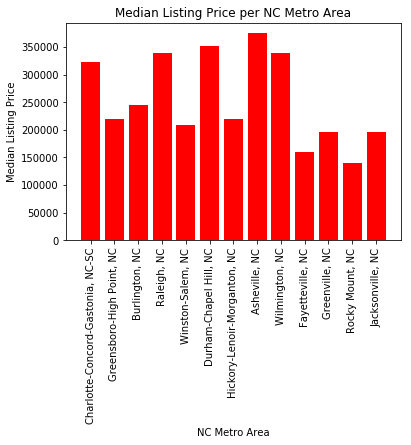

In [47]:
# Obtain the x and y coordinates for NC
x_axis = nc_sort['CBSATitle']
y_axis = nc_sort['MedListPrice']
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color="r", align="center")
plt.xticks(tick_locations, nc_sort['CBSATitle'], rotation="vertical")

# Set a Title and labels
plt.title("Median Listing Price per NC Metro Area")
plt.xlabel("NC Metro Area")
plt.ylabel("Median Listing Price")

Text(0, 0.5, 'hrank')

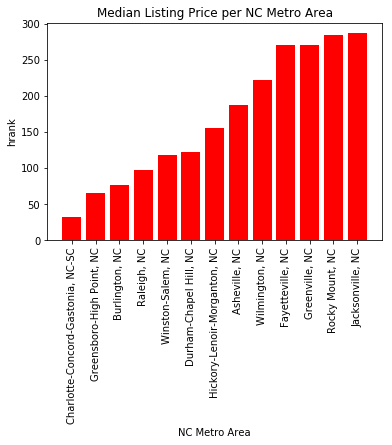

In [46]:
# Obtain the x and y coordinates for NC
x_axis = nc_sort['CBSATitle']
y_axis = nc_sort['hrank']
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color="r", align="center")
plt.xticks(tick_locations, nc_sort['CBSATitle'], rotation="vertical")

# Set a Title and labels
plt.title("Median Listing Price per NC Metro Area")
plt.xlabel("NC Metro Area")
plt.ylabel("hrank")